In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

### Data Preparation

In [8]:
TestDF = pd.read_csv("/Users/nikkkikong/Desktop/501 Assignment6 /yelp_NBtest.csv")
TrainDF = pd.read_csv("/Users/nikkkikong/Desktop/501 Assignment6 /yelp_NBtrain.csv")
TrainDF.rename({"Unnamed: 0":"Label"}, axis="columns", inplace=True)
TrainDF["Label"] = pd.Categorical(TrainDF["Label"])
TestDF.rename({"Unnamed: 0":"Label"}, axis="columns", inplace=True)
TestDF["Label"] = pd.Categorical(TestDF["Label"])

## Save labels
TestLabels=TestDF["Label"]
## remove labels
## Make a copy of TestDF
CopyTestDF=TestDF.copy()
TestDF = TestDF.drop(["Label"], axis=1)
## DF seperate TRAIN SET from the labels
TrainDF_nolabels=TrainDF.drop(["Label"], axis=1)
#print(TrainDF_nolabels)
TrainLabels=TrainDF["Label"]

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.PuRd):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()


from sklearn.metrics import classification_report as clsr
def evaluate_model(model, X_test_data, y_test_labels):
    y_predicted_labels = model.predict(X_test_data)
    print(clsr(y_test_labels, y_predicted_labels))

### Multinomial Naive Bayes Classifier


The prediction from NB is:
['neu' 'neg' 'pos' 'neg' 'neg' 'neg' 'neg' 'neu' 'neg' 'pos' 'neu' 'neu'
 'neg' 'neu' 'neg' 'pos' 'pos' 'neu' 'neg' 'neg' 'neg']

The actual labels are:
0     neu
1     neg
2     pos
3     neu
4     neu
5     pos
6     neu
7     pos
8     neu
9     pos
10    neu
11    neu
12    neg
13    pos
14    neg
15    pos
16    neg
17    pos
18    neg
19    neg
20    neg
Name: Label, dtype: category
Categories (3, object): ['neg', 'neu', 'pos']
Confusion matrix, without normalization
[[6 0 1]
 [4 3 0]
 [1 3 3]]

Classification Report:

              precision    recall  f1-score   support

         neg       0.55      0.86      0.67         7
         neu       0.50      0.43      0.46         7
         pos       0.75      0.43      0.55         7

    accuracy                           0.57        21
   macro avg       0.60      0.57      0.56        21
weighted avg       0.60      0.57      0.56        21



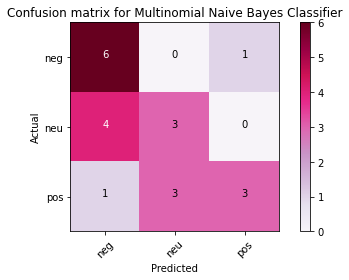

In [10]:
from sklearn.naive_bayes import MultinomialNB
MyModelNB= MultinomialNB()
MyModelNB.fit(TrainDF_nolabels, TrainLabels)
Prediction = MyModelNB.predict(TestDF)
print("\nThe prediction from NB is:")
print(Prediction)
print("\nThe actual labels are:")
print(TestLabels)
## confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(TestLabels, Prediction,labels=['neg', 'neu', 'pos'])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['neg', 'neu', 'pos'],
                      title='Confusion matrix for Multinomial Naive Bayes Classifier')
print("\nClassification Report:\n")
evaluate_model(MyModelNB, TestDF, TestLabels)

### Bernoulli Naive Bayes Classifier


Bernoulli prediction:
 ['pos' 'neg' 'pos' 'pos' 'neu' 'pos' 'neu' 'pos' 'neg' 'pos' 'pos' 'pos'
 'neg' 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'neg' 'pos']

Actual:
0     neu
1     neg
2     pos
3     neu
4     neu
5     pos
6     neu
7     pos
8     neu
9     pos
10    neu
11    neu
12    neg
13    pos
14    neg
15    pos
16    neg
17    pos
18    neg
19    neg
20    neg
Name: Label, dtype: category
Categories (3, object): ['neg', 'neu', 'pos']
Confusion matrix, without normalization
[[4 0 3]
 [1 2 4]
 [0 0 7]]

Classification Report:

              precision    recall  f1-score   support

         neg       0.80      0.57      0.67         7
         neu       1.00      0.29      0.44         7
         pos       0.50      1.00      0.67         7

    accuracy                           0.62        21
   macro avg       0.77      0.62      0.59        21
weighted avg       0.77      0.62      0.59        21



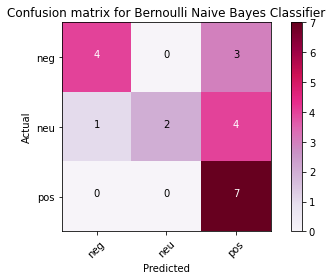

In [11]:
from sklearn.naive_bayes import BernoulliNB
## Bernoulli uses 0 and 1 data (not counts)
## So - we need to re-format our data first
## Make a COPY of the DF
TrainDF_nolabels_Binary=TrainDF_nolabels.copy()   ## USE .copy()
TrainDF_nolabels_Binary[TrainDF_nolabels_Binary >= 1] = 1
TrainDF_nolabels_Binary[TrainDF_nolabels_Binary < 1] = 0
BernModel = BernoulliNB()
BernModel.fit(TrainDF_nolabels_Binary, TrainLabels)
#BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
print("\nBernoulli prediction:\n", BernModel.predict(TestDF))
print("\nActual:")
print(TestLabels)
bn_matrix = confusion_matrix(TestLabels, BernModel.predict(TestDF),labels=['neg', 'neu', 'pos'])
plt.figure()
plot_confusion_matrix(bn_matrix, classes=['neg', 'neu', 'pos'],
                      title='Confusion matrix for Bernoulli Naive Bayes Classifier')
print("\nClassification Report:\n")
evaluate_model(BernModel, TestDF, TestLabels)

### SVM Classifier with a Linear Kernel

SVM prediction:
 ['neu' 'neg' 'pos' 'pos' 'neu' 'pos' 'neu' 'neu' 'pos' 'pos' 'neu' 'neu'
 'neg' 'pos' 'neg' 'pos' 'neu' 'pos' 'pos' 'neg' 'neu']
Actual:
0     neu
1     neg
2     pos
3     neu
4     neu
5     pos
6     neu
7     pos
8     neu
9     pos
10    neu
11    neu
12    neg
13    pos
14    neg
15    pos
16    neg
17    pos
18    neg
19    neg
20    neg
Name: Label, dtype: category
Categories (3, object): ['neg', 'neu', 'pos']
Confusion matrix, without normalization
[[4 2 1]
 [0 5 2]
 [0 1 6]]

Classification Report:

              precision    recall  f1-score   support

         neg       1.00      0.57      0.73         7
         neu       0.62      0.71      0.67         7
         pos       0.67      0.86      0.75         7

    accuracy                           0.71        21
   macro avg       0.76      0.71      0.71        21
weighted avg       0.76      0.71      0.71        21



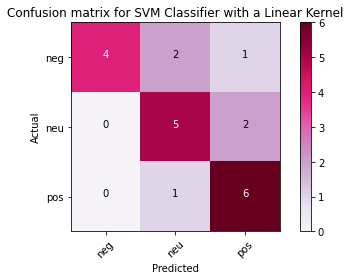

In [12]:
from sklearn.svm import LinearSVC
SVM_Model=LinearSVC(C=.1)
SVM_Model.fit(TrainDF_nolabels, TrainLabels)
#BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
print("SVM prediction:\n", SVM_Model.predict(TestDF))
print("Actual:")
print(TestLabels)

SVM_matrix = confusion_matrix(TestLabels, SVM_Model.predict(TestDF),labels=['neg', 'neu', 'pos'])
plt.figure()
plot_confusion_matrix(SVM_matrix, classes=['neg', 'neu', 'pos'],
                      title='Confusion matrix for SVM Classifier with a Linear Kernel')
print("\nClassification Report:\n")
evaluate_model(SVM_Model, TestDF, TestLabels)                                    

### SVM Classifier with a Polynomial Kernel

[LibSVM]SVM prediction:
 ['pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'neu' 'pos' 'pos' 'pos' 'pos' 'pos'
 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos']
Actual:
0     neu
1     neg
2     pos
3     neu
4     neu
5     pos
6     neu
7     pos
8     neu
9     pos
10    neu
11    neu
12    neg
13    pos
14    neg
15    pos
16    neg
17    pos
18    neg
19    neg
20    neg
Name: Label, dtype: category
Categories (3, object): ['neg', 'neu', 'pos']
Confusion matrix, without normalization
[[0 0 7]
 [0 1 6]
 [0 0 7]]

Classification Report:

              precision    recall  f1-score   support

         neg       0.00      0.00      0.00         7
         neu       1.00      0.14      0.25         7
         pos       0.35      1.00      0.52         7

    accuracy                           0.38        21
   macro avg       0.45      0.38      0.26        21
weighted avg       0.45      0.38      0.26        21



/Users/nikkkikong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


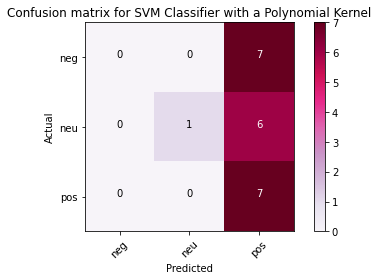

In [27]:
from sklearn.svm import SVC
SVM_Model=sklearn.svm.SVC(C=30, kernel='poly',degree=2,
                           gamma="auto", verbose=True)
SVM_Model.fit(TrainDF_nolabels, TrainLabels)
print("SVM prediction:\n", SVM_Model.predict(TestDF))
print("Actual:")
print(TestLabels)

SVM_matrix = confusion_matrix(TestLabels, SVM_Model.predict(TestDF),labels=['neg', 'neu', 'pos'])
plt.figure()
plot_confusion_matrix(SVM_matrix, classes=['neg', 'neu', 'pos'],
                      title='Confusion matrix for SVM Classifier with a Polynomial Kernel')
print("\nClassification Report:\n")
evaluate_model(SVM_Model, TestDF, TestLabels)    

### SVM Classifier with a Radial Kernel

[LibSVM]SVM prediction:
 ['neu' 'neg' 'pos' 'pos' 'neu' 'pos' 'neu' 'pos' 'pos' 'pos' 'pos' 'neu'
 'neg' 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'neg' 'neg']
Actual:
0     neu
1     neg
2     pos
3     neu
4     neu
5     pos
6     neu
7     pos
8     neu
9     pos
10    neu
11    neu
12    neg
13    pos
14    neg
15    pos
16    neg
17    pos
18    neg
19    neg
20    neg
Name: Label, dtype: category
Categories (3, object): ['neg', 'neu', 'pos']
Confusion matrix, without normalization
[[5 0 2]
 [0 4 3]
 [0 0 7]]

Classification Report:

              precision    recall  f1-score   support

         neg       1.00      0.71      0.83         7
         neu       1.00      0.57      0.73         7
         pos       0.58      1.00      0.74         7

    accuracy                           0.76        21
   macro avg       0.86      0.76      0.77        21
weighted avg       0.86      0.76      0.77        21



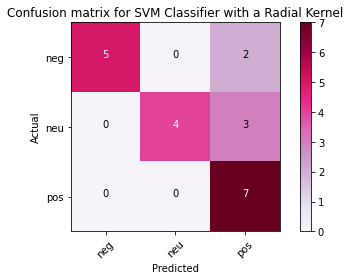

In [35]:
from sklearn.svm import SVC
SVM_Model=sklearn.svm.SVC(C=30, kernel='rbf', 
                           verbose=True, gamma="auto")
SVM_Model.fit(TrainDF_nolabels, TrainLabels)
print("SVM prediction:\n", SVM_Model.predict(TestDF))
print("Actual:")
print(TestLabels)

SVM_matrix = confusion_matrix(TestLabels, SVM_Model.predict(TestDF),labels=['neg', 'neu', 'pos'])
plt.figure()
plot_confusion_matrix(SVM_matrix, classes=['neg', 'neu', 'pos'],
                      title='Confusion matrix for SVM Classifier with a Radial Kernel')
print("\nClassification Report:\n")
evaluate_model(SVM_Model, TestDF, TestLabels)    